In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import os
import IPython

In [2]:
# load images from the "images" dir
emotions = [
    "angry", 
    "disgust", 
    #"fear", 
    "happy", 
    "neutral", 
    #"sad", 
    #"surprise"
]
images_per_emotion = 20
images = {}
for emotion in emotions:
    files = os.listdir(f"images/{emotion}")
    for i in range(images_per_emotion):
        # read grayscale image
        image = plt.imread(f"images/{emotion}/{files[i]}", 0)
        if emotion not in images:
            images[emotion] = []
        images[emotion].append(image)

In [12]:
seconds_per_trial = 60
seconds_between_trials = 60
seconds_per_image = 5
trials_with_same_emotion = 6

assert seconds_per_trial > seconds_per_image
assert seconds_per_trial % seconds_per_image == 0
print(f"Total time per session: {len(emotions) * trials_with_same_emotion * seconds_per_trial / 60} minutes")
print(f"Showing {seconds_per_trial // seconds_per_image} images per trial")

Total time per session: 4.0 minutes
Showing 2 images per trial


In [13]:
session_measurements = pd.DataFrame(columns=["emotion", "blood_pressure", "heart_rate"])
trial_emotions = []
rnd = np.random.Generator(np.random.PCG64())
for _ in range(trials_with_same_emotion):
    emotion_block = emotions.copy()
    rnd.shuffle(emotion_block)
    trial_emotions.extend(emotion_block)

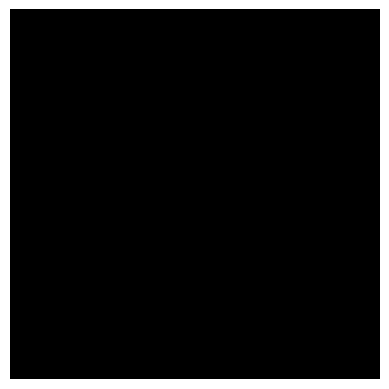

KeyboardInterrupt: 

In [14]:
while len(trial_emotions) > 0:
    emotion = trial_emotions.pop()
    images_per_trial = seconds_per_trial // seconds_per_image
    trial_images = rnd.choice(images[emotion], size=images_per_trial, replace=False)
    for image in trial_images:        
        fig, ax = plt.subplots()
        ax.imshow(image, cmap="gray")
        ax.axis("off")
        plt.show()
        time.sleep(seconds_per_image)
        IPython.display.clear_output(False)
        
    # show black screen
    fig, ax = plt.subplots()
    ax.imshow(np.zeros_like(trial_images[0]), cmap="gray")
    ax.axis("off")
    plt.show()
    
    blood_pressure = input("Blood pressure in mmHg:")
    heart_rate = input("Heart rate in PR BPM:")
    session_measurements = pd.concat([
        session_measurements, 
        pd.DataFrame(
            [[emotion, blood_pressure, heart_rate]], 
            columns=["emotion", "blood_pressure", "heart_rate"]
        )
    ])
    time.sleep(seconds_between_trials)
    IPython.display.clear_output(False)
print("Session finished :)")
        

In [15]:
session_measurements.to_csv("session_measurements.csv", index=False)